<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatURL2020/blob/master/day2/02-Basics_of_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of data handling

## Pandas 
pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Pandas Dataframes**

One way of manipulating your data (slicing, filtering, removing variables, creating new features, taking operations of branches) in a simple, visually appealing way is to use `pandas` dataframes, a beatiful and efficient Python data structure library. Recommended for exploratory data analysis, probably not for high performance applications.


The main object here is `pandas.DataFrame` – a two-dimensional table of (possibly heterogeneous) data. There is a number a ways to create a `DataFrame`, but possibly one of the most common ways is to construct it by reading a text file of tabulated data with a specified delimiter (i.e. CSV files):

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HSE-LaMBDA/MLatURL2020/master/day2/weather_barcelona_2020-02-10.csv",
                 delimiter=';')
type(df)

pandas.core.frame.DataFrame

What is this? Weather in Barcelona for last 2 weeks (taken from [here](https://www.meteoblue.com/en/weather/archive/export/barcelona_spain_3128760?daterange=2019-03-05+to+2019-03-19&params=&params%5B%5D=11%3B2+m+above+gnd&params%5B%5D=660%3Bsfc&params%5B%5D=32%3B10+m+above+gnd%3B31%3B10+m+above+gnd&utc_offset=1&aggregation=hourly&temperatureunit=CELSIUS&windspeedunit=KILOMETER_PER_HOUR)).

In [4]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Relative Humidity  [2 m above gnd]',
       'Total Precipitation (high resolution)  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

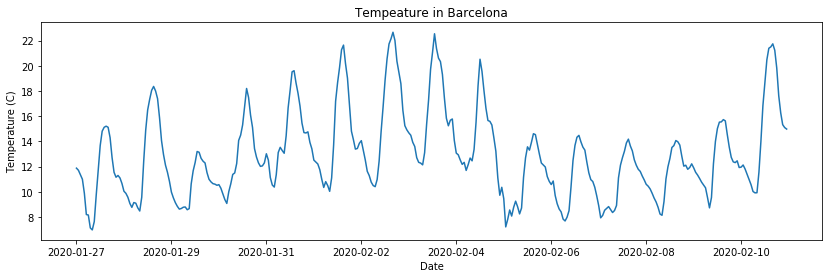

In [5]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]), df['Temperature  [2 m above gnd]'])
ax.axis('tight')
ax.set_title('Tempeature in Barcelona')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (C)');

Let's dig into the data.

Look at the first N (5 by default) rows of the data:

In [11]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2019,3,5,0,0,13.22,0.0,7.70,127.41
1,2019,3,5,1,0,13.26,0.0,6.29,113.63
2,2019,3,5,2,0,13.22,0.0,7.86,105.95
3,2019,3,5,3,0,13.22,0.0,9.96,102.53
4,2019,3,5,4,0,13.20,0.0,12.77,111.50


Let's pick a rows from 3 to 10 and store the result as an independent copy of the original data:

In [12]:
small_df = df.loc[3:10].copy()
small_df

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
3,2019,3,5,3,0,13.22,0.0,9.96,102.53
4,2019,3,5,4,0,13.20,0.0,12.77,111.50
5,2019,3,5,5,0,12.74,0.0,14.21,98.75
6,2019,3,5,6,0,12.55,0.0,13.36,85.36
7,2019,3,5,7,0,12.28,0.0,13.05,65.56
8,2019,3,5,8,0,12.23,0.0,13.09,58.50
9,2019,3,5,9,0,12.90,0.0,15.83,72.80
10,2019,3,5,10,0,13.42,0.0,17.56,74.54


Note that small_df has index starting from 3:

In [13]:
small_df.index

RangeIndex(start=3, stop=11, step=1)

Indexing with '.loc' uses that index, also it includes the last element of the slice:

In [14]:
small_df.loc[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
4,2019,3,5,4,0,13.20,0.0,12.77,111.50
5,2019,3,5,5,0,12.74,0.0,14.21,98.75


While using just [4:5] selects the row, which is 4'th from the beginning
of current `DataFrame` (it's index is 7), and it excludes the last element
of the slice:

In [15]:
small_df[4:5]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
7,2019,3,5,7,0,12.28,0.0,13.05,65.56


You can list the column names:

In [16]:
small_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]',
       'Total Precipitation (high resolution)  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

And easily select them:

In [17]:
small_df['Temperature  [2 m above gnd]']

3     13.22
4     13.20
5     12.74
6     12.55
7     12.28
8     12.23
9     12.90
10    13.42
Name: Temperature  [2 m above gnd], dtype: float64

Or select a group of columns (note the nested [] brackets):

In [18]:
small_df[['Hour', 'Temperature  [2 m above gnd]']]

,Hour,Temperature [2 m above gnd]
3,3,13.22
4,4,13.20
5,5,12.74
6,6,12.55
7,7,12.28
8,8,12.23
9,9,12.90
10,10,13.42


**Exercise**. Try to select days with some rain. And the same excluding weekends?

You can even add new columns:

In [19]:
small_df['T_squared'] = small_df['Temperature  [2 m above gnd]']**2
small_df['T_squared']

3     174.7684
4     174.2400
5     162.3076
6     157.5025
7     150.7984
8     149.5729
9     166.4100
10    180.0964
Name: T_squared, dtype: float64

**Exercise**. Figure out some interesting new column. Can it be physically-motivated?

You can select rows with boolean indices:

In [20]:
small_df[[False, True, False, False, False, False, False, False]]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared
4,2019,3,5,4,0,13.2,0.0,12.77,111.5,174.24


Obviously, spelling out this list of True and False values is not very practical.
However one can get such list from some selection, e.g.:

In [21]:
small_df['T_squared'] > 2.0

3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
Name: T_squared, dtype: bool

And hence the selection can be done like this:

In [22]:
small_df[small_df['T_squared'] > 2.0]

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation (high resolution) [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],T_squared
3,2019,3,5,3,0,13.22,0.0,9.96,102.53,174.7684
4,2019,3,5,4,0,13.20,0.0,12.77,111.50,174.2400
5,2019,3,5,5,0,12.74,0.0,14.21,98.75,162.3076
6,2019,3,5,6,0,12.55,0.0,13.36,85.36,157.5025
7,2019,3,5,7,0,12.28,0.0,13.05,65.56,150.7984
8,2019,3,5,8,0,12.23,0.0,13.09,58.50,149.5729
9,2019,3,5,9,0,12.90,0.0,15.83,72.80,166.4100
10,2019,3,5,10,0,13.42,0.0,17.56,74.54,180.0964


## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [0]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [0]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,-1.359722,-0.515774,1.396831,-0.064067
2013-01-02,1.215245,0.202695,-1.089379,0.307725
2013-01-03,0.489987,-0.385811,-0.764385,-2.183181
2013-01-04,0.680014,0.298680,-1.469834,-1.835706
2013-01-05,0.856720,0.281778,0.175882,1.163814
2013-01-06,-0.136092,-0.416611,2.446754,1.668228


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [0]:
df2 = pd.DataFrame({ 'A' : 1.,
	'B' : pd.Timestamp('20130102'),
	'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
	'D' : np.array([3] * 4,dtype='int32'),
	'E' : pd.Categorical(["test","train","test","train"]),
	'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [0]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [0]:
df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

Here is how to view the top and bottom rows of the frame:

In [0]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,2018,11,4,0,0,7.03,0.6,14.76,257.32
1,2018,11,4,1,0,7.05,0.2,14.49,255.62
2,2018,11,4,2,0,7.04,0.0,14.35,252.47
3,2018,11,4,3,0,6.49,0.0,16.10,259.70
4,2018,11,4,4,0,6.25,0.0,17.29,267.61


In [0]:
df.tail(3)

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
189,2018,11,11,21,0,-3.60,0.0,21.61,119.98
190,2018,11,11,22,0,-3.85,0.0,21.87,122.91
191,2018,11,11,23,0,-4.04,0.0,21.68,125.54


Display the index, columns, and the underlying NumPy data:

In [0]:
df.index

RangeIndex(start=0, stop=192, step=1)

In [0]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Total Precipitation  [sfc]',
       'Wind Speed  [10 m above gnd]', 'Wind Direction  [10 m above gnd]'],
      dtype='object')

In [0]:
df.values

array([[2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 6.0000e-01, 1.4760e+01,
        2.5732e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 2.0000e-01, 1.4490e+01,
        2.5562e+02],
       [2.0180e+03, 1.1000e+01, 4.0000e+00, ..., 0.0000e+00, 1.4350e+01,
        2.5247e+02],
       ...,
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1610e+01,
        1.1998e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1870e+01,
        1.2291e+02],
       [2.0180e+03, 1.1000e+01, 1.1000e+01, ..., 0.0000e+00, 2.1680e+01,
        1.2554e+02]])

describe() shows a quick statistic summary of your data:

In [0]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Total Precipitation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
count,192.0,192.0,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000
mean,2018.0,11.0,7.500000,11.500000,0.0,2.961406,0.004167,11.575833,189.998958
std,0.0,0.0,2.297278,6.940284,0.0,2.814121,0.045572,7.412555,84.645082
min,2018.0,11.0,4.000000,0.000000,0.0,-4.040000,0.000000,1.800000,35.540000
25%,2018.0,11.0,5.750000,5.750000,0.0,1.740000,0.000000,6.350000,99.112500
50%,2018.0,11.0,7.500000,11.500000,0.0,2.975000,0.000000,8.660000,218.985000
75%,2018.0,11.0,9.250000,17.250000,0.0,4.712500,0.000000,16.345000,270.297500
max,2018.0,11.0,11.000000,23.000000,0.0,9.330000,0.600000,30.120000,360.000000


# seaborn: statistical data visualization

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [23]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

## Exercise 1
Plot histogram of temperature values from the weather dataset

## Exercise 2
Plot joint distribution using `sns.jointplot` of the temperature and wind speed